In [19]:
# Import standard libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from IPython.display import display, HTML, Video

# Import our custom ASCII art generator module
import ascii_art_generator
from ascii_art_generator import generate_ascii_art, convert_video_to_ascii

## Setup and Initialize ASCII Character Images

Before we can generate ASCII art, we need to create image representations of ASCII characters. For a different font or style, you can customize the character set and font parameters.

In [20]:
# Check if ASCII character images already exist
ascii_images_dir = 'ascii_art_generator/ascii_images'

if not os.path.exists(ascii_images_dir) or len(os.listdir(ascii_images_dir)) < 95:
    ascii_art_generator.generate_ascii_images()

## ASCII Art Generator for images

Let's load some example images to work with. If you have your own images, feel free to modify the paths! <br>
The most important parameter is `num_sub_images_width`, which controls the number of sub-images along the width of the output ASCII art. The number of sub-images along the height is adjusted automatically to maintain the aspect ratio of the ASCII character images. Higher values yield more detail but require more processing time. The parameters kernel_size and iterations can be adjusted to finetune the matching between the sub-images and ASCII characters.

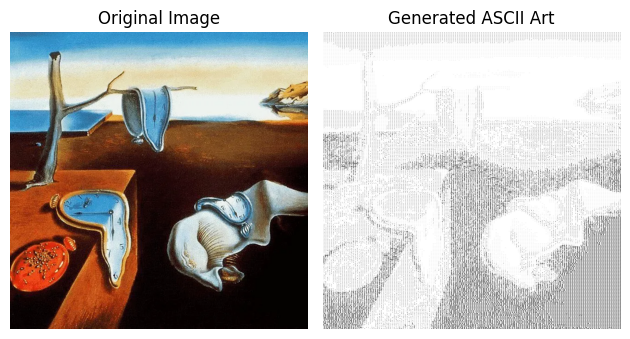

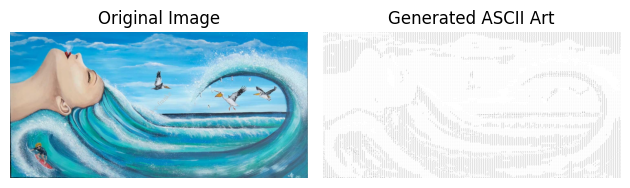

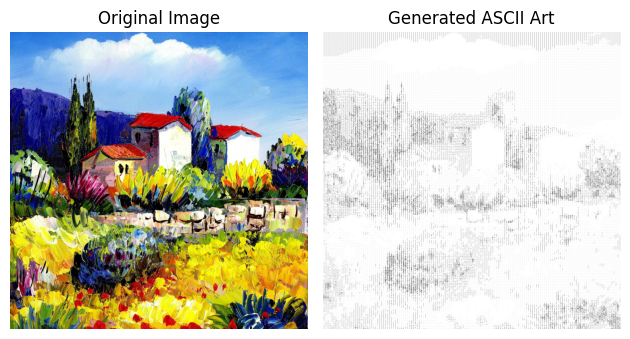

In [21]:
# Check for example images
example_images_dir = 'example_images'

# Get all images in the example_images directory
example_images = [f for f in os.listdir(example_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_path = os.path.join(example_images_dir, example_images[0])  # Use the first image found
resolution = 150
kernel_size = 3
iterations = 4

for example_image in example_images:
    image_path = os.path.join(example_images_dir, example_image)
    try:
        ascii_result = generate_ascii_art(
            image_path=image_path,
            ascii_images_dir='ascii_art_generator/ascii_images',
            num_sub_images_width=resolution,
            kernel_size=kernel_size,
            iterations=iterations,
            output_path=f'output/{os.path.splitext(example_image)[0]}_ascii_art.png',
            plot_enabled=True,
            save_enabled=True,
            generate_ascii_images_flag=False
        )
    except Exception as e:
        print("Image conversion failed for file:", example_image)


## ASCII Art Generator for videos

Now let's move on to the exciting world of ASCII art videos! We'll convert video files frame by frame in the manner we handled images. <br>
The main parameter is again the `num_sub_images_width`, which works similar as for images. Additonally, you can increase the speed of the video to reduce processing time by skipping frames. Furthermore, you can adjust the start and end time of the video to process only a specific segment.

In [22]:
# Check for example videos
example_videos_dir = 'example_videos'
video_files = [f for f in os.listdir(example_videos_dir) 
                if f.lower().endswith(('.mp4', '.avi'))]

# Video conversion parameters
resolution = 200
speed_multiplier = 2.0
for video_file in video_files:
    video_path = os.path.join(example_videos_dir, video_file)
    try:
        # Generate the ASCII video
        success = convert_video_to_ascii(
            input_video_path=video_path,
            output_video_path=f'output/{os.path.splitext(video_file)[0]}_ascii.mp4',
            start_time=0.0,
            end_time=None,
            num_sub_images_width=resolution,
            speed_multiplier= speed_multiplier,
            ascii_images_dir="ascii_art_generator/ascii_images"
        )
    except:
        print("Video conversion failed for file:", video_file)

Converting frames: 250frames [03:45,  1.11frames/s]                     
Converting frames: 851frames [12:38,  1.12frames/s]                     
